import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob  
import pandas as pd
from tabulate import tabulate
from scipy.stats import norm


Import non diabetic and diabetic datas

In [3]:
folder_path = 'data_for_diabetes/' # set path to 'data_for_diabetes/'
diabetic = glob.glob(folder_path + 'case *.csv') # make diabetic = case 1 - case 208 

for file in diabetic:

    df = pd.read_csv(file) #make df = all the files that were selected in diabetic 

nondiabetic = pd.read_csv('data for no diabetes.csv') #make nondiabetic = 'data for no diabetes.csv'

Diabetic BG vs Time

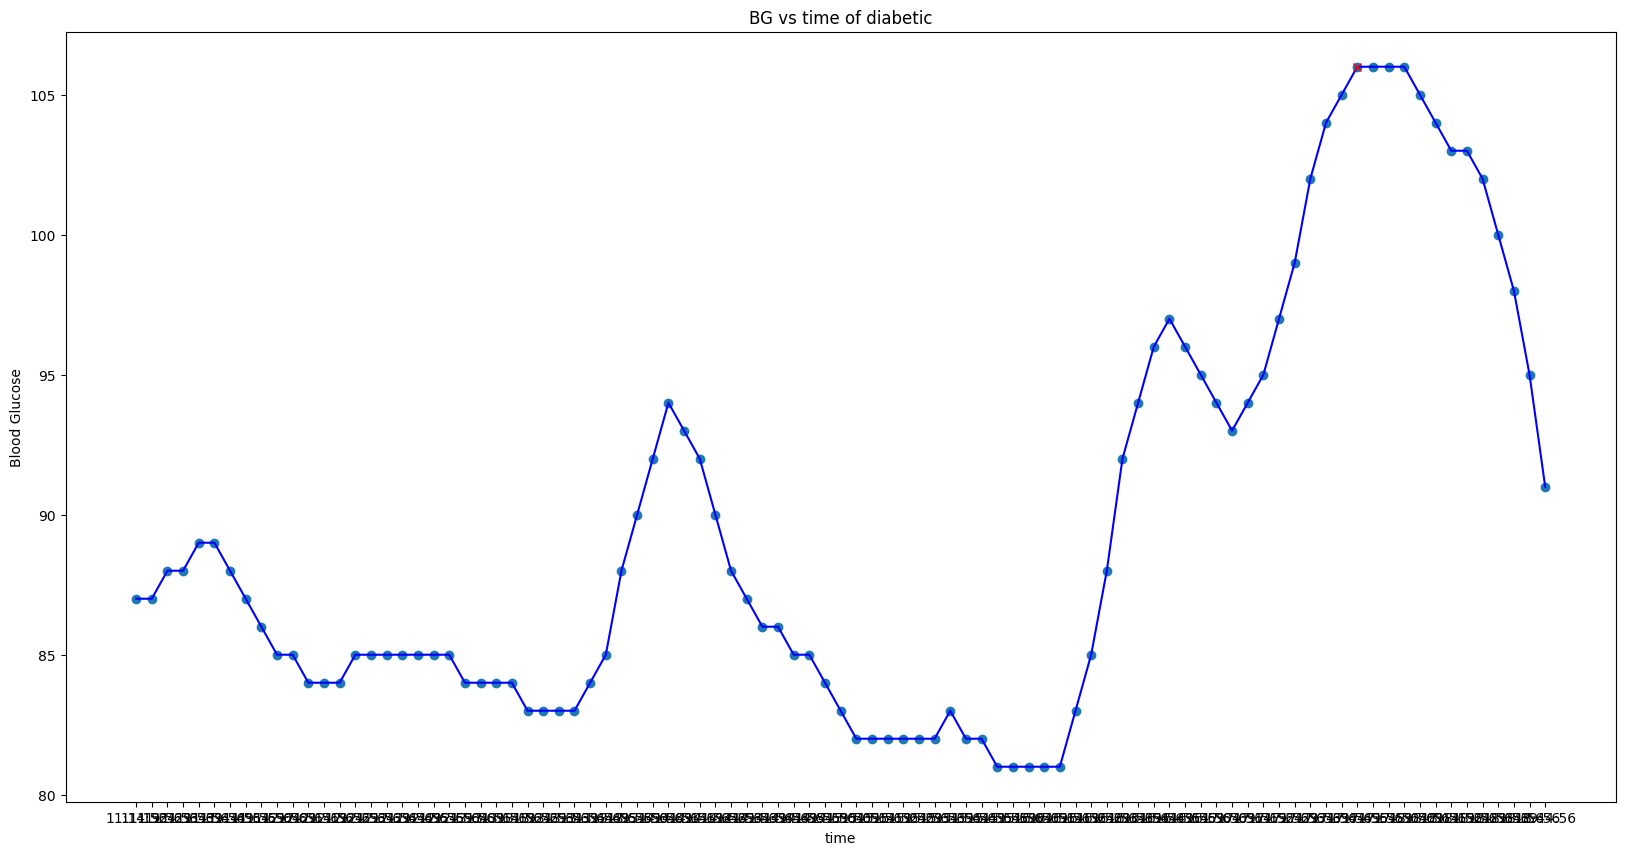

In [4]:
plt.figure(figsize=(20, 10))
x = df.iloc[134:225 , 1] #choose data from row 134 to 225 in column 1 
y = df.iloc[134:225 , 2]#choose data from row 134 to 225 in column 2

plt.scatter(x, y)

plt.title('BG vs time of diabetic')
plt.xlabel('time')
plt.ylabel('Blood Glucose')

plt.plot(x, y, color='blue')

max_y = y.max()  #finding y max
max_x = x[y.idxmax()]  #finding x max according to y max

# Highlighting the highest point
plt.plot(max_x, max_y, "x", color='red')

plt.show()


Diabetic analyse

In [5]:
df_diabetic = df.iloc[:, 2]  #choose data from all row in column 2

mean_diabetic = df_diabetic.mean() #find mean
median_diabetic = df_diabetic.median()#find median
range_diabetic = df_diabetic.max() - df_diabetic.min()#find mode
std_diabetic = df_diabetic.std()#find sd


stats_df = pd.DataFrame({
    'Statistic Diabetic': ['Mean', 'Median', 'Range', 'Standard Deviation'],
    'Value': [mean_diabetic, median_diabetic, range_diabetic, std_diabetic]
}) #put datas in the table

print(tabulate(stats_df, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════════════╤═════════╕
│    │ Statistic Diabetic   │   Value │
╞════╪══════════════════════╪═════════╡
│  0 │ Mean                 │ 92.3819 │
├────┼──────────────────────┼─────────┤
│  1 │ Median               │ 90      │
├────┼──────────────────────┼─────────┤
│  2 │ Range                │ 52      │
├────┼──────────────────────┼─────────┤
│  3 │ Standard Deviation   │  9.3658 │
╘════╧══════════════════════╧═════════╛


Nondiabetic BG vs Time

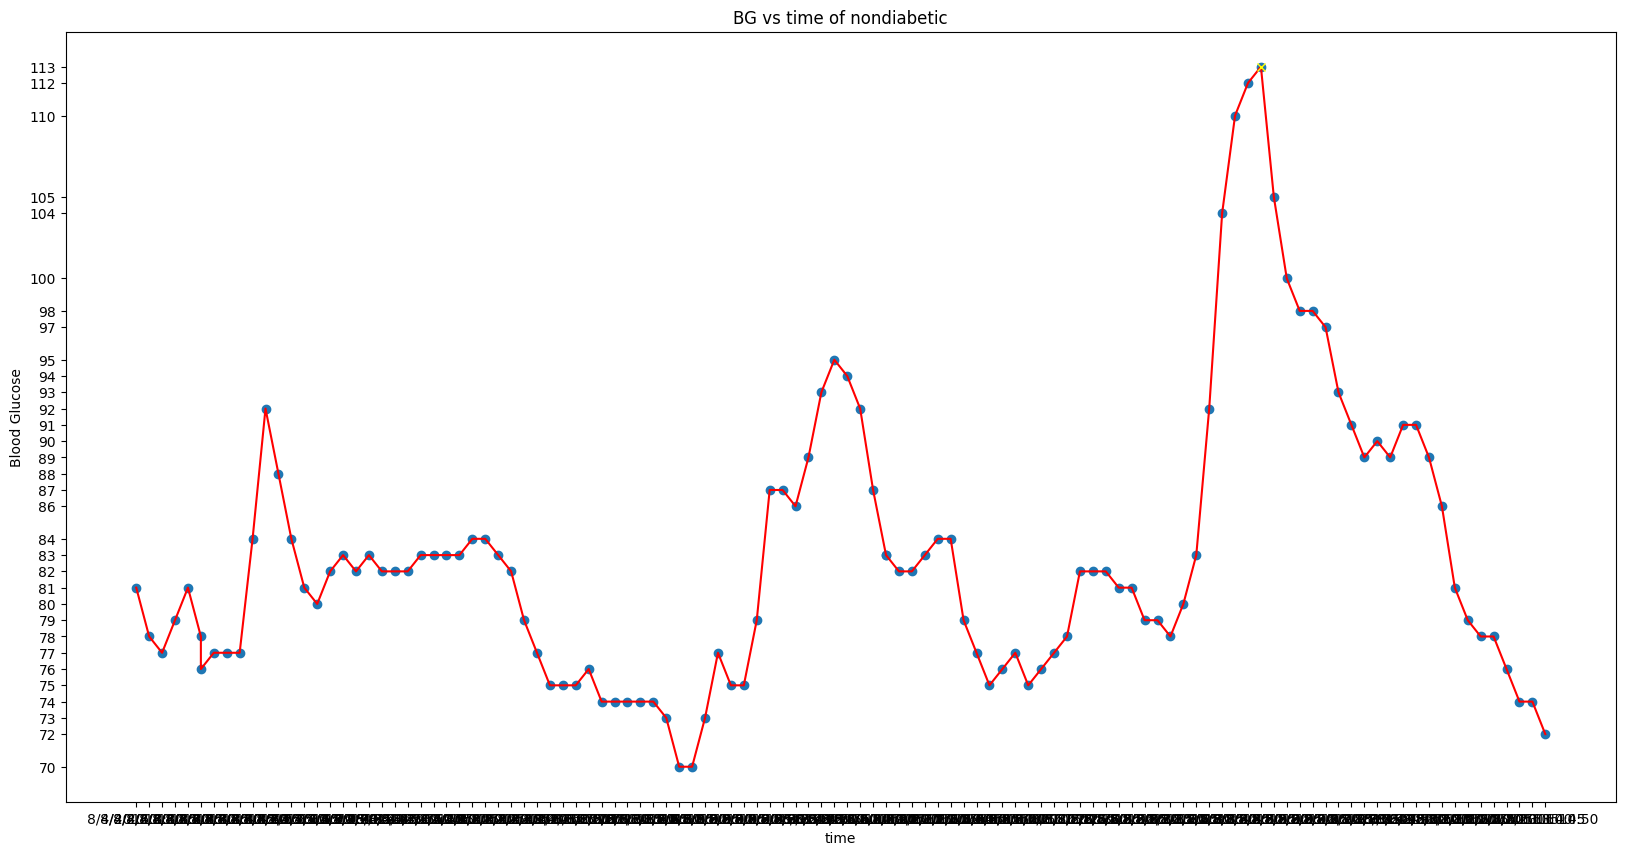

In [6]:

plt.figure(figsize=(20, 10))
x = nondiabetic.iloc[:, 2]#choose data from all row in column 2
y = data = pd.to_numeric(nondiabetic.iloc[:, 3], errors='coerce') #from stackoverflow, this ignores the non-numeric number 
plt.scatter(x, y)

plt.title('BG vs time of nondiabetic')
plt.xlabel('time')
plt.ylabel('Blood Glucose')



sorted_y = np.sort(y.unique())
plt.yticks(sorted_y)

plt.plot(x, y, color='red')

max_y = y.max()  #find y max
max_x = x[y.idxmax()]  #finding x max according to y max


plt.plot(max_x, max_y, "x", color='yellow')#mark the highest peak 


Nondiabetic analyse

In [7]:
df_nondiabetic = pd.to_numeric(nondiabetic.iloc[:, 3], errors='coerce') #from stackoverflow, this ignores the non-numeric number 
#1:50
mean_nondiabetic = df_nondiabetic.mean()#find mean 
median_nondiabetic = df_nondiabetic.median()#find median
range_nondiabetic = df_nondiabetic.max() - df_nondiabetic.min()#find range
std_nondiabetic = df_nondiabetic.std()#find 


stats_df = pd.DataFrame({
    'Statistic nondiabetic': ['Mean', 'Median', 'Range', 'Standard Deviation'],
    'Value': [mean_nondiabetic, median_nondiabetic, range_nondiabetic, std_nondiabetic]
})
print(tabulate(stats_df, headers='keys', tablefmt='fancy_grid'))#putting data in the table 

╒════╤═════════════════════════╤══════════╕
│    │ Statistic nondiabetic   │    Value │
╞════╪═════════════════════════╪══════════╡
│  0 │ Mean                    │ 82.9286  │
├────┼─────────────────────────┼──────────┤
│  1 │ Median                  │ 82       │
├────┼─────────────────────────┼──────────┤
│  2 │ Range                   │ 43       │
├────┼─────────────────────────┼──────────┤
│  3 │ Standard Deviation      │  8.53051 │
╘════╧═════════════════════════╧══════════╛


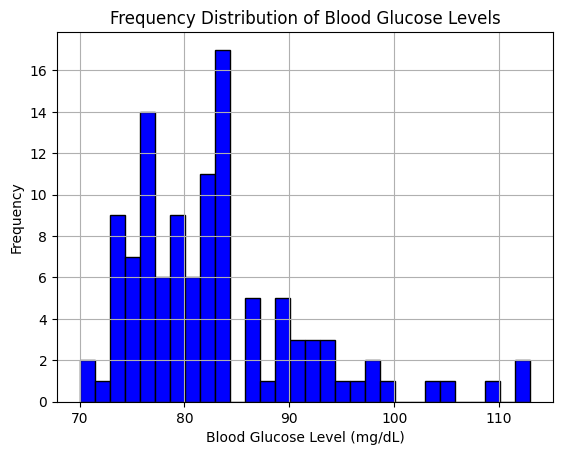

In [8]:




nondiabetic_hist = pd.to_numeric(nondiabetic.iloc[1:50, 3], errors='coerce')


nondiabetic_hist = data.dropna()


plt.hist(nondiabetic_hist, bins=30, edgecolor='black', color='blue') 
plt.title('Frequency Distribution of Blood Glucose Levels')
plt.xlabel('Blood Glucose Level (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)  
plt.show()


making a distribution graph of diabetic

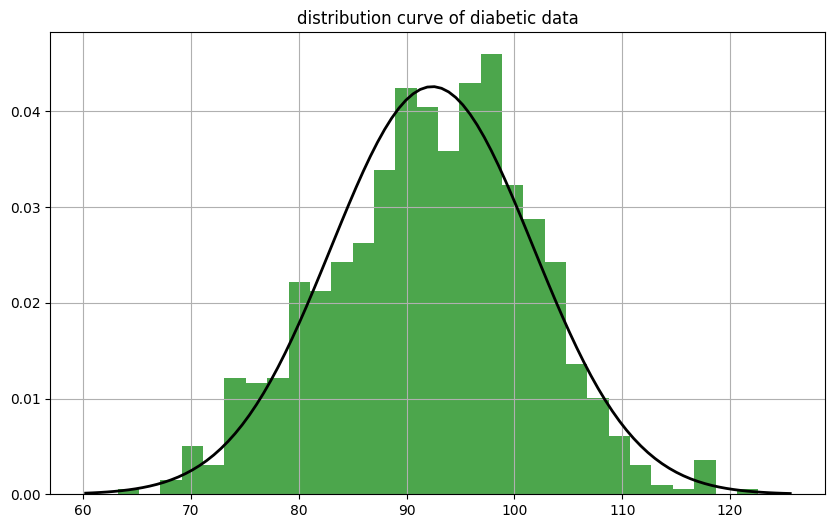

In [29]:




data = np.random.normal(mean_diabetic , std_diabetic, 1000)#randomly generate 1000 values with the same mean and std as diabetic data 


plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, color='g')#create histogram of the random data 
xmin, xmax = plt.xlim() #finding the domain of x 
x = np.linspace(xmin, xmax, 100)#This creates an array of 100 points along the x-axis 
pdf_values = norm.pdf(x, mean_diabetic , std_diabetic) #sd plot 

plt.plot(x, pdf_values, 'k', linewidth=2) #plot normal dist. curve on top of where the diabetic distribution curve is 


plt.title("distribution curve of diabetic data" )
plt.grid(True)  
plt.show()


distribution for Nondiabetic

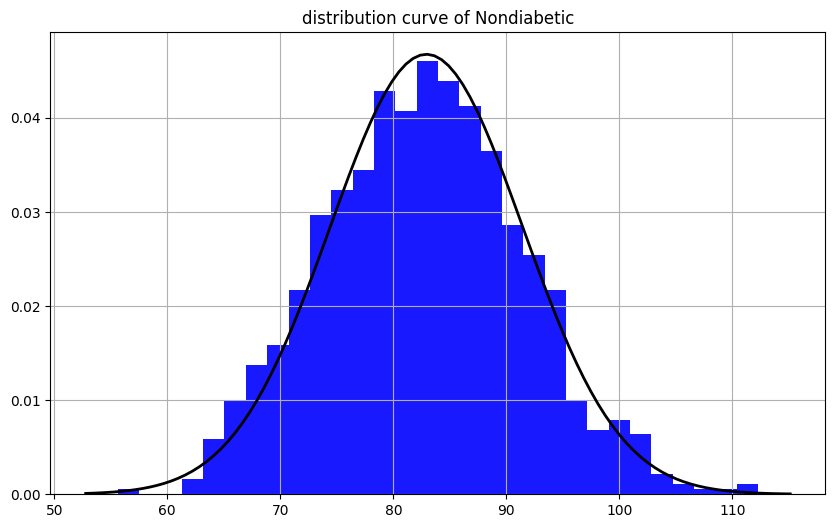

In [30]:




data = np.random.normal(mean_nondiabetic , std_nondiabetic , 1000) #randomly generate 1000 values with the same mean and std as non-diabetic data 


plt.figure(figsize=(10, 6))

plt.hist(data, bins=30, density=True, alpha=0.9, color='b')#create histogram of the random data 
xmin, xmax = plt.xlim()#finding the domain of x 
x = np.linspace(xmin, xmax, 100)#This creates an array of 100 points along the x-axis 

pdf_values = norm.pdf(x, mean_nondiabetic , std_nondiabetic )

plt.plot(x, pdf_values, 'k', linewidth=2) #the normal dist. curve

plt.title("distribution curve of Nondiabetic")

plt.grid(True)  
plt.show()


calculating confidence interval 


In [11]:
import scipy.stats as stats

x1_bar = mean_diabetic
x2_bar = mean_nondiabetic
n1 = 208
n2 = 57

# Calculate the standard error (SE)
SE = ((std_diabetic**2 / n1) + (std_nondiabetic**2 / n2)) ** 0.5
SE 
# Degrees of freedom 
df = n2 - 1 

# Critical value from the t-distribution for a 95% confidence interval
t_critical = stats.t.ppf(0.95, df)  # Two-tailed test using scipy.stat

# Margin of error (ME)
ME = t_critical * SE

# Confidence interval (CI)
CI_lower = (x1_bar - x2_bar) - ME
CI_upper = (x1_bar - x2_bar) + ME

 
confidence_interval = pd.DataFrame({
    'confidence interval' : ['lower bound', 'upper bound'],
    'Value': [CI_lower, CI_upper]
})
print(tabulate(confidence_interval, headers='keys', tablefmt='fancy_grid'))#plot the data in table 

╒════╤═══════════════════════╤══════════╕
│    │ confidence interval   │    Value │
╞════╪═══════════════════════╪══════════╡
│  0 │ lower bound           │  7.27371 │
├────┼───────────────────────┼──────────┤
│  1 │ upper bound           │ 11.633   │
╘════╧═══════════════════════╧══════════╛


calculating p-value



null hypothesis = no difference between the datas

alternative hypothesis  = significant difference between the datas

In [12]:
import scipy.stats as stats
#find t-value 
T_value = (x1_bar - x2_bar)/SE 
T_value 

#find p-value 
p_value = 2 * (1 - stats.t.cdf(abs(T_value), df))


p = pd.DataFrame({
    'p value of two tailed test' : ['P value', 'conclusion:'],
    'Value': [p_value, 'p value < 0.05 thus rejecting the null hypothesis, the datas are significantly different']
})
print(tabulate(p, headers='keys', tablefmt='fancy_grid'))#plot data in table 



╒════╤══════════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════╕
│    │ p value of two tailed test   │ Value                                                                                    │
╞════╪══════════════════════════════╪══════════════════════════════════════════════════════════════════════════════════════════╡
│  0 │ P value                      │ 1.3170684542984645e-09                                                                   │
├────┼──────────────────────────────┼──────────────────────────────────────────────────────────────────────────────────────────┤
│  1 │ conclusion:                  │ p value < 0.05 thus rejecting the null hypothesis, the datas are significantly different │
╘════╧══════════════════════════════╧══════════════════════════════════════════════════════════════════════════════════════════╛


since null was rejected, and the datas are different, the data of diabetic and non diabetic overtime could be used to predict whether a person has diabetes or not

cohen's d 

In [28]:
#finding SD pool 
SDp = np.sqrt(((n1 - 1) * std_diabetic**2 + (n2 - 1) * std_nondiabetic**2) / (n1 + n2 - 2))

#doing cohen's d test 
d = (x1_bar - x2_bar) / SDp

p = pd.DataFrame({
    'value of cohens d' : ['d', 'conclusion'],
    'Value': [d, 'the value of d is 1, indicating that the difference between the groups are 1 standard deviation away, meaning the datas are significantly different']
})
print(tabulate(p, headers='keys', tablefmt='fancy_grid'))#plot data in table 



╒════╤═════════════════════╤═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│    │ value of cohens d   │ Value                                                                                                                                               │
╞════╪═════════════════════╪═════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│  0 │ d                   │ 1.0281770134429753                                                                                                                                  │
├────┼─────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  1 │ conclusion          │ the value of d is 1, indicating that the difference between the groups are 1